In [26]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [27]:
df = pd.read_csv("../Python/train.csv")


In [28]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


### Preprocessing

In [29]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

name          object
artists       object
album_name    object
genre         object
dtype: object

In [30]:
df = df.drop(['name','duration_ms', 'explicit', 'loudness','mode', 'artists', 'album_name','genre','popularity_confidence', 'key', 'features_duration_ms', 'time_signature'], axis=1)

In [31]:
df.head()

,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
0,46,0.690,0.513,0.0975,0.302000,0.53600,0.281,0.6350,142.221,567.0,141.0,1.279305
1,0,0.069,0.196,0.0805,0.283000,0.93400,0.360,0.0336,75.596,617.0,155.0,2.367412
2,3,0.363,0.854,0.0397,0.000089,0.80000,0.262,0.4890,116.628,652.0,162.0,3.700483
3,23,0.523,0.585,0.0765,0.066400,0.00127,0.117,0.3850,140.880,619.0,155.0,1.279305
4,25,0.643,0.687,0.0539,0.000576,0.09690,0.299,0.6370,143.956,733.0,183.0,4.067086


In [32]:
df_saved = df

In [33]:
df_saved.head()

,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
0,46,0.690,0.513,0.0975,0.302000,0.53600,0.281,0.6350,142.221,567.0,141.0,1.279305
1,0,0.069,0.196,0.0805,0.283000,0.93400,0.360,0.0336,75.596,617.0,155.0,2.367412
2,3,0.363,0.854,0.0397,0.000089,0.80000,0.262,0.4890,116.628,652.0,162.0,3.700483
3,23,0.523,0.585,0.0765,0.066400,0.00127,0.117,0.3850,140.880,619.0,155.0,1.279305
4,25,0.643,0.687,0.0539,0.000576,0.09690,0.299,0.6370,143.956,733.0,183.0,4.067086


In [34]:
df=df.drop(['acousticness','instrumentalness', 'liveness', 'valence', 'tempo','n_beats','n_bars','processing'], axis=1)

In [35]:
df.head()

,popularity,danceability,energy,speechiness
0,46,0.690,0.513,0.0975
1,0,0.069,0.196,0.0805
2,3,0.363,0.854,0.0397
3,23,0.523,0.585,0.0765
4,25,0.643,0.687,0.0539


In [36]:
# Right now applying on above four columns to perfomr clustering on it
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df)

### Clustering

In [37]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [40]:
!pip install scikit-learn-intelex


Defaulting to user installation because normal site-packages is not writeable


In [41]:
from sklearnex import patch_sklearn
patch_sklearn()

# Now you can use scikit-learn as usual
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


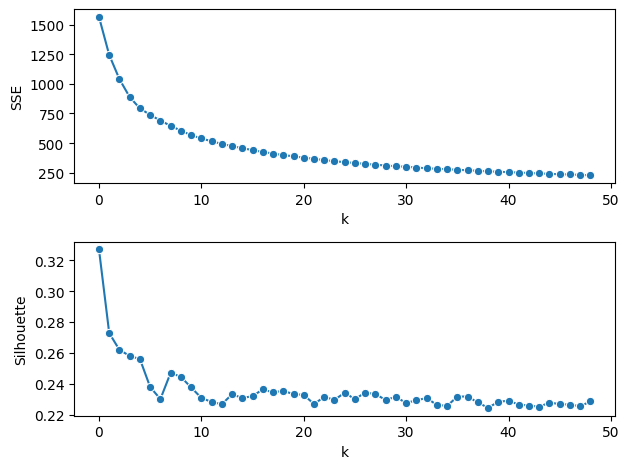

In [42]:
fig, axs = plt.subplots(2) # 1 row, 2 columns

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots

In [43]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(train_data)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [44]:
print('labels', np.unique(kmeans.labels_, return_counts=True))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels (array([0, 1]), array([5105, 9895], dtype=int64))
sse 1564.8929112554476
silhouette 0.32716307171753106


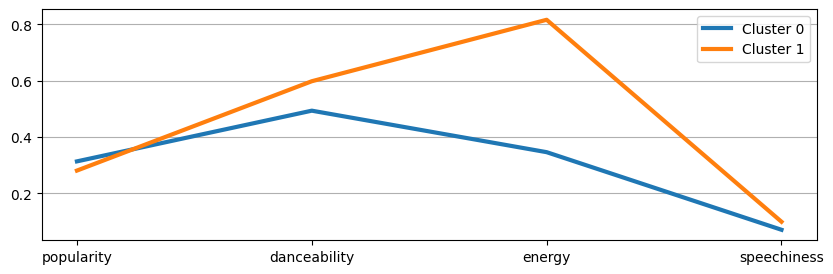

In [46]:
plt.figure(figsize=(10, 3))

for i in range(len(kmeans.cluster_centers_)):
    plt.plot(range(0, 4), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
# plt.xticks(range(0, 4), list(df_train.columns))
plt.xticks(range(len(df.columns)), df.columns)

plt.legend(bbox_to_anchor=(1,1))
plt.grid(axis='y')
plt.show()

In [47]:
df_clusters = df.copy()
df_clusters['Labels'] = kmeans.labels_

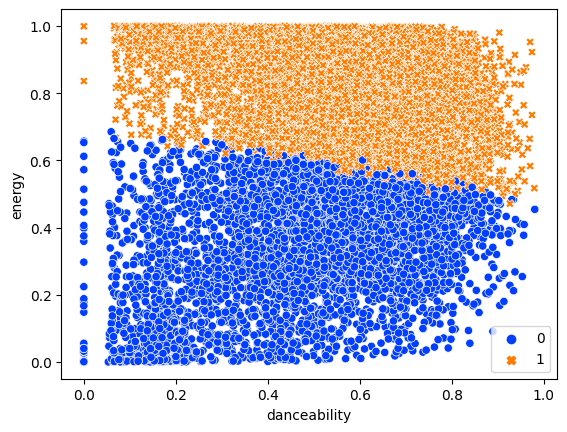

In [48]:
sns.scatterplot(data=df_clusters, 
                x="danceability",
                y="energy", 
                hue=kmeans.labels_, 
                style=kmeans.labels_, 
                palette="bright")
plt.show()


In [49]:
df_clusters.head()

,popularity,danceability,energy,speechiness,Labels
0,46,0.690,0.513,0.0975,0
1,0,0.069,0.196,0.0805,0
2,3,0.363,0.854,0.0397,1
3,23,0.523,0.585,0.0765,1
4,25,0.643,0.687,0.0539,1


In [51]:
pclass_xt = pd.crosstab(df_clusters['popularity'], df_clusters['Labels'])
pclass_xt

Labels,0,1
popularity,,
0,510,965
1,76,138
2,48,96
3,33,75
4,43,64
...,...,...
83,1,3
84,1,1
85,0,2


In [52]:
psurv_xt = pd.crosstab(df_clusters['Labels'], df['popularity'])
psurv_xt

popularity,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,88,94
Labels,,,,,,,,,,,,,,,,,,,,,
0,510,76,48,33,43,54,79,44,56,53,...,5,6,3,3,0,1,1,0,0,1
1,965,138,96,75,64,79,107,90,106,122,...,7,3,6,6,2,3,1,2,2,0


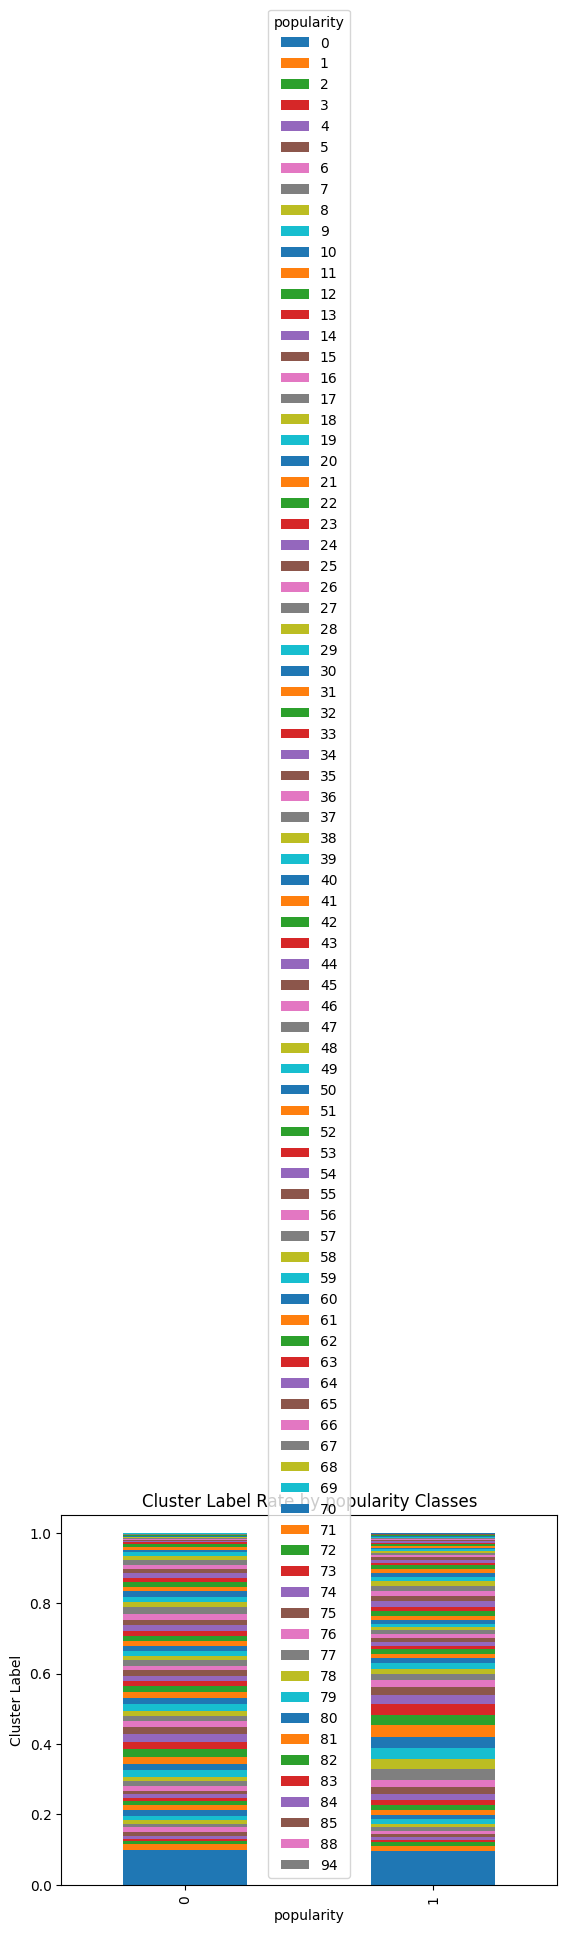

In [53]:
psurv_xt_pct = psurv_xt.div(psurv_xt.sum(1).astype(float), axis=0)
psurv_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by popularity Classes')
plt.xlabel('popularity')
plt.ylabel('Cluster Label')
plt.show()

In [54]:
df_clusters[df_clusters['Labels']==1].describe()

,popularity,danceability,energy,speechiness,Labels
count,9895.000000,9895.000000,9895.000000,9895.000000,9895.0
mean,26.369985,0.585957,0.816173,0.092908,1.0
std,18.083322,0.173537,0.127392,0.086906,0.0
min,0.000000,0.000000,0.471000,0.000000,1.0
25%,14.000000,0.490000,0.714000,0.041700,1.0
50%,23.000000,0.606000,0.836000,0.058300,1.0
75%,40.000000,0.713000,0.930000,0.104000,1.0
max,88.000000,0.979000,1.000000,0.924000,1.0


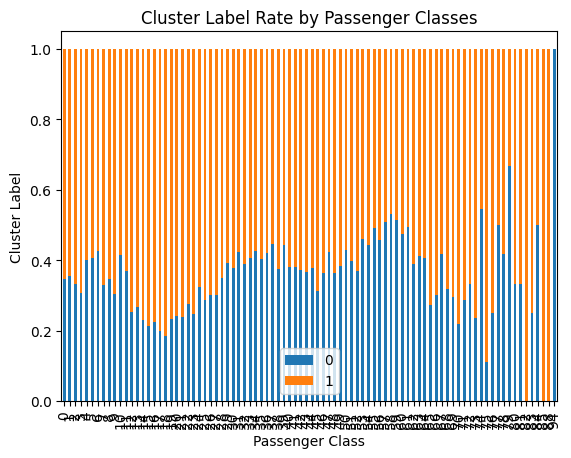

In [55]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Cluster Label')
plt.legend(loc='best')
plt.show()

### Hierarchical

In [56]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [57]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='complete')
model = model.fit(train_data)

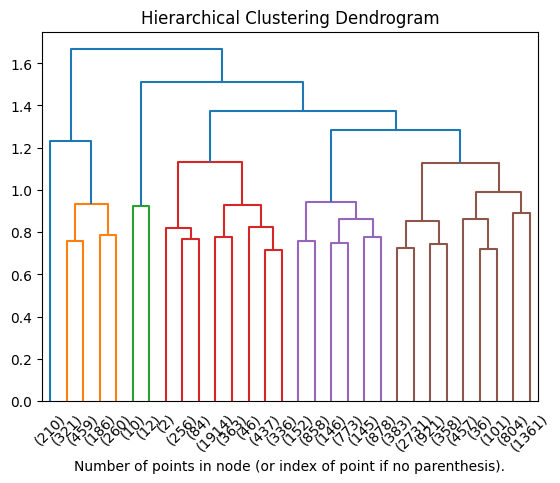

In [58]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp", color_threshold=1.2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [59]:
# get the labels according to a specific threshold value cut
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=1.2, criterion='distance')

In [60]:
labels

array([5, 2, 4, ..., 5, 6, 6], dtype=int32)

In [61]:
print('Silhouette', silhouette_score(train_data, labels))

Silhouette 0.1568001782514475


### Choosing the number of clusters

In [62]:
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
hier.fit(train_data)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

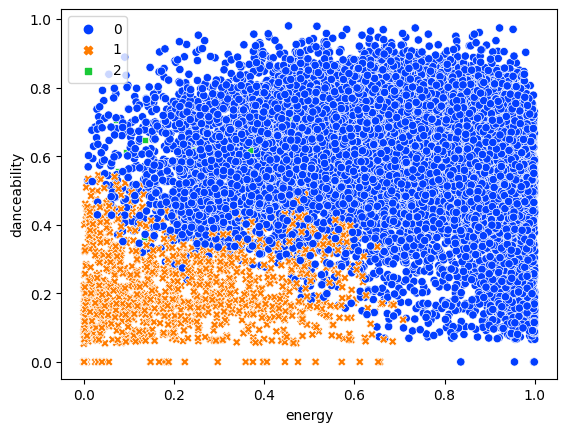

In [63]:
sns.scatterplot(data=df_clusters, 
                x="energy", 
                y="danceability", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

#### connectivity constraint

In [64]:
# hierarchical clustering
# Compute the (weighted) graph of k-Neighbors for points in X
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)

In [65]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, 
                                n_clusters=None, 
                                metric='euclidean', 
                                linkage='ward', 
                                connectivity=connectivity)
                                
# connecet: Defines for each sample the neighboring 
# samples following a given structure of the data.

model = model.fit(train_data)

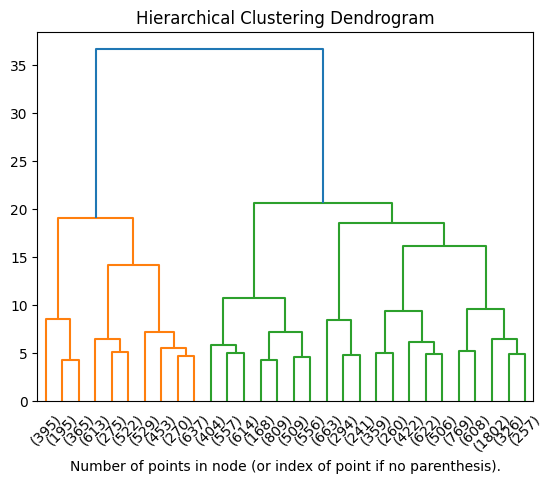

In [66]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [67]:
ward = AgglomerativeClustering(n_clusters=3, 
                               linkage='ward', 
                               metric='euclidean',
                               connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, ward.labels_))

labels {0: 4254, 1: 7129, 2: 3617}
silhouette 0.1669691317124741


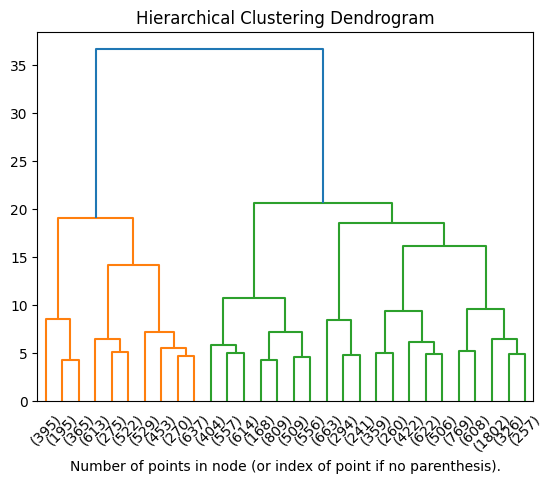

In [68]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [69]:
ward = AgglomerativeClustering(n_clusters=3, 
                               linkage='ward', 
                               metric='euclidean',
                               connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, ward.labels_))

labels {0: 4254, 1: 7129, 2: 3617}
silhouette 0.1669691317124741


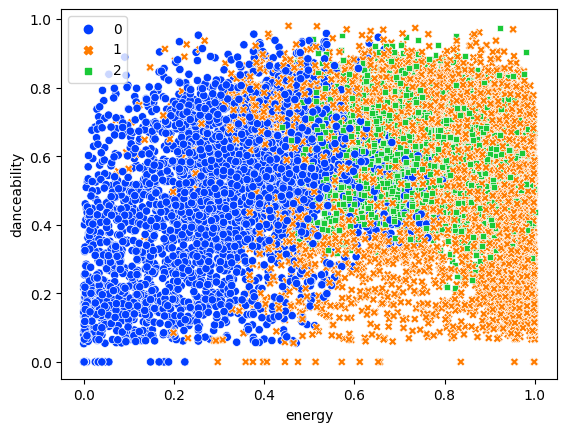

In [70]:
sns.scatterplot(data=df_clusters, 
                x="energy", 
                y="danceability", 
                hue=ward.labels_, 
                style=ward.labels_, 
                palette="bright")
plt.show()

In [71]:
print('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan',  connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 10, 1: 14988, 2: 2}
silhouette 0.45224740513692785


In [72]:
print('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='l1', connectivity=connectivity)
complete_linkage.fit(train_data)

hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage
labels {0: 17, 1: 14976, 2: 7}
silhouette 0.43300515705766374
